<h1>Importación de librerias</h1>

In [1]:
import os
import pandas as pd
from osgeo import gdal
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h3>Proceso de carga de datos en formato .TIF para poder ser manipulados y visualizados</h3>
<p>Creamos vectores donde almacenar los nombres de archivos</p>

In [2]:
dir = "Raster/Berrueco II"
ficheros=[]
nombre=[]

<p>Path de ficheros TIF para ordenarlos</p>

In [3]:
for file in os.listdir(dir):
        if file.endswith(".tif"):
            ficheros.append(os.path.join(dir, file))
            nombre.append(file.split('.')[0])

<p>Ordenamos por nombre la lista de ficheros y de nombres de ficheros<p>

In [4]:
sorted(ficheros)
sorted(nombre)

['Altitud',
 'Arcillas',
 'Arenas',
 'Carbonatos',
 'Carbono_Organico',
 'Carcavas',
 'Curvatura_Perfil',
 'Curvatura_Plana',
 'Distancia_Carreteras',
 'Factor_LS',
 'Geologia',
 'Limos',
 'Orientaciones',
 'Overland_Flow_Distance',
 'Pendiente',
 'Stream_Power_Index',
 'Topographic_Position_Index',
 'Topographic_Wetness_Index',
 'Unidades_Edaficas',
 'Usos_Del_Suelo']

<p>Creamos un Dataframe con el nombre de los TIF</p>

In [5]:
datos = pd.DataFrame(columns=nombre)

<p>Recoger tamaño de las imagenes TIF que vamos a tratar</p>

In [6]:
tif = gdal.Open(ficheros[1])
tif_band = tif.GetRasterBand(1)
x = tif_band.XSize
y = tif_band.YSize
print("Tamaño archivos cargados:",x,"x",y,"\n")

Tamaño archivos cargados: 1540 x 980 



<p>Recorremos lista de ficheros. SOLO TRATAMOS LOS DATOS NO DATA -> -1</p>

In [7]:
contador = 0
for f in ficheros:
    n = nombre[contador]
    MDT = gdal.Open(f)
    
    # Patrones sin datos se incluyen como -1
    MDT.GetRasterBand(1).SetNoDataValue(-1)
    
    # Pasamos los datos a float
    band = MDT.GetRasterBand(1).ReadAsArray().astype(float)
    
    # Se desechan las dos primeras filas y columnas debido a calculos de borde
    band = band[1:y, 1:x]
    
    # Reconstruimos el array con el tamaño de filas x columnas
    x_recorte = x - 1
    y_recorte = y - 1
    band = np.reshape(band, x_recorte*y_recorte)
    
    # Estos serán nuestros datos
    datos[n] = band
    
    contador = contador + 1

<hr>
<h3>Proceso de visualización de datos (SIN TRATAR ni utilizar ENCODE, datos en crudo)</h3>

<h4>1. ALTITUD (Continua)</h4>
<p>Datos únicos: </p>

In [8]:
print(datos.Altitud.unique())

[335.08200073 334.99798584 334.99398804 ... 363.81100464 364.89401245
 377.34399414]


In [9]:
print("Máximo: ", max(datos.Altitud))
print("Mínimo: ", min(datos.Altitud))
print("Media: ", datos["Altitud"].mean())
print("STD: ", datos["Altitud"].std())


Máximo:  597.3300170898438
Mínimo:  319.3869934082031
Media:  434.51609908975917
STD:  45.96829436124962


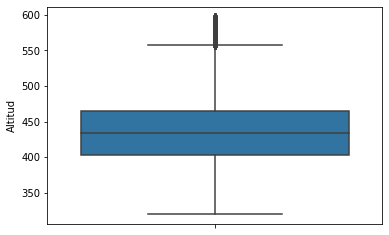

In [10]:
sns.boxplot( y=datos["Altitud"] );
plt.show()

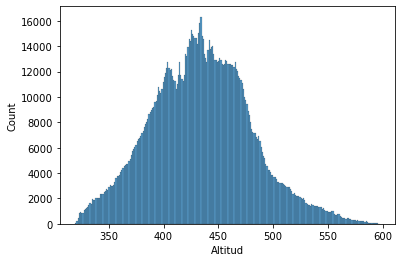

In [11]:
sns.histplot(data=datos, x="Altitud")
plt.show()

<hr>
<h4>2. ARCILLAS (Continua)</h4>
<p>Datos únicos: </p>

In [12]:
print(datos.Arcillas.unique())

[-3.40282347e+38  4.12312737e+01  3.81525040e+01  3.86056786e+01
  3.79228706e+01  4.50158730e+01  4.01295052e+01  3.96007957e+01
  3.83386078e+01  3.64399376e+01  4.64837265e+01  4.55423508e+01
  4.33093872e+01  4.14295082e+01  3.60319443e+01  4.29500275e+01
  3.81090889e+01  3.43966103e+01  4.30795097e+01  4.10004883e+01
  4.21534729e+01  4.52983360e+01  4.90545120e+01  4.05100021e+01
  4.49505844e+01  3.29338837e+01  3.22853775e+01  3.52291985e+01
  3.52503242e+01  3.83882713e+01  3.74584503e+01  3.57979774e+01
  3.34136391e+01  4.15903931e+01  3.65595589e+01  4.28387260e+01
  4.15485687e+01  4.17124329e+01  4.39355659e+01  3.65998993e+01
  4.24837723e+01  3.62450790e+01  3.64040489e+01  3.45597191e+01
  3.21714516e+01  3.51589584e+01  3.60608025e+01  3.42357826e+01
  3.59729156e+01  3.28521500e+01  3.78262863e+01  3.71650848e+01
  4.21380081e+01  4.20761871e+01  4.25008163e+01  4.23161926e+01
  3.84460106e+01  3.73790932e+01  3.62261658e+01  3.44814224e+01
  3.32487907e+01  3.62950

In [13]:
print("Máximo: ", max(datos.Arcillas))
print("Mínimo: ", min(datos.Arcillas))
print("Media: ", datos["Arcillas"].mean())
print("STD: ", datos["Arcillas"].std())

Máximo:  49.05451202392578
Mínimo:  -3.4028234663852886e+38
Media:  -2.99407974839198e+36
STD:  3.1778430413690185e+37


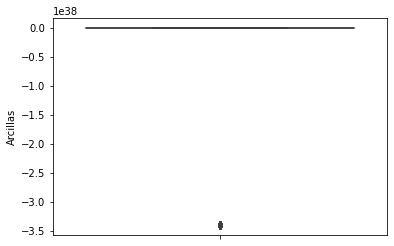

In [14]:
sns.boxplot( y=datos["Arcillas"] );
plt.show()

<hr>
<h4>3. ARENAS (Continua)</h4>
<p>Datos únicos: </p>

In [15]:
print(datos.Arenas.unique())

[-3.40282347e+38  1.78144455e+01  1.30733795e+01  1.25964584e+01
  1.35490875e+01  1.39981155e+01  2.20773315e+01  1.07426605e+01
  1.22176056e+01  1.58847656e+01  1.10752563e+01  1.45705261e+01
  1.91266556e+01  9.84263611e+00  2.60247040e+01  1.84689102e+01
  1.77417450e+01  2.47283859e+01  1.97298279e+01  2.05036926e+01
  1.23399506e+01  8.16096497e+00  6.43371582e+00  1.11614990e+01
  1.23509903e+01  1.80154419e+01  1.86549835e+01  1.37975159e+01
  2.10029526e+01  1.55725555e+01  1.53273468e+01  1.62092972e+01
  1.55224152e+01  4.72036743e+00  1.79592590e+01  1.50817108e+01
  1.98408661e+01  2.04696350e+01  1.24257812e+01  2.04901276e+01
  9.78955078e+00  1.68879852e+01  1.52195282e+01  2.49170685e+01
  2.34683456e+01  2.10669250e+01  1.86507187e+01  2.36360931e+01
  1.89089890e+01  2.01791077e+01  1.02116623e+01  1.12432556e+01
  1.78483887e+01  1.68259811e+01  1.64495392e+01  1.66638107e+01
  1.56057968e+01  1.25583344e+01  1.59421387e+01  1.62549438e+01
  2.15077057e+01  1.70888

In [16]:
print("Máximo: ", max(datos.Arenas))
print("Mínimo: ", min(datos.Arenas))
print("Media: ", datos["Arenas"].mean())
print("STD: ", datos["Arenas"].std())

Máximo:  28.291458129882812
Mínimo:  -3.4028234663852886e+38
Media:  -2.99407974839198e+36
STD:  3.1778430413690185e+37


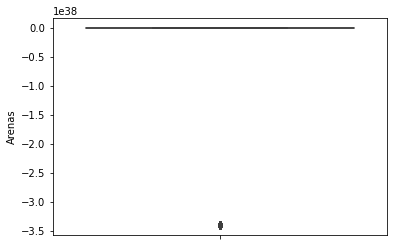

In [17]:
sns.boxplot( y=datos["Arenas"] );
plt.show()

<hr>
<h4>4. CARBONATOS (Discreta)</h4>
<p>Datos únicos: </p>

In [18]:
print(datos.Carbonatos.unique())

[-3.40282347e+38  3.00000000e+00  4.00000000e+00]


In [19]:
print("Máximo: ", max(datos.Carbonatos))
print("Mínimo: ", min(datos.Carbonatos))
print("Media: ", datos["Carbonatos"].mean())
print("STD: ", datos["Arenas"].std())

Máximo:  4.0
Mínimo:  -3.4028234663852886e+38
Media:  -2.99407974839198e+36
STD:  3.1778430413690185e+37


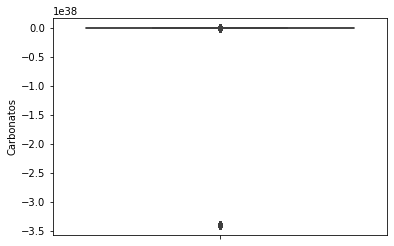

In [20]:
sns.boxplot( y=datos["Carbonatos"] );
plt.show()

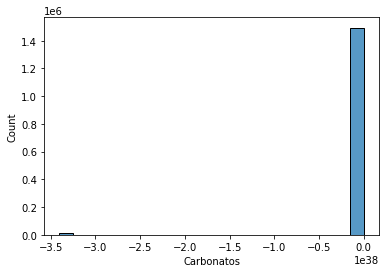

In [21]:
sns.histplot(data=datos, x="Carbonatos")
plt.show()

<hr>
<h4>4. CARBONO ORGÁNICO (Continua)</h4>
<p>Datos únicos: </p>

In [22]:
print(datos.Carbono_Organico.unique())

[-3.40282347e+38  3.21802795e+02  4.14981720e+02  4.79618958e+02
  4.61625153e+02  3.38176147e+02  2.81146484e+02  5.06080536e+02
  3.86230042e+02  3.87796570e+02  2.70614014e+02  3.40193665e+02
  2.92393829e+02  4.69763214e+02  2.33587662e+02  1.98548508e+02
  2.15764114e+02  2.40950745e+02  2.85048340e+02  2.41578766e+02
  2.28375183e+02  3.59819153e+02  3.63319580e+02  4.08367828e+02
  3.98261108e+02  5.40766235e+02  5.30020630e+02  5.56403687e+02
  4.44693268e+02  4.74596893e+02  5.95354919e+02  5.96714111e+02
  5.59940063e+02  5.57229858e+02  5.41902527e+02  2.77864990e+02
  3.05370453e+02  3.64153137e+02  4.27038513e+02  4.55521851e+02
  4.32357941e+02  5.47506897e+02  5.24779358e+02  5.00803558e+02
  4.81645691e+02  5.50849976e+02  5.59244690e+02  5.12679260e+02
  5.67112427e+02  6.14185791e+02  4.61041779e+02  4.77596375e+02
  3.34160980e+02  3.04002472e+02  3.26351135e+02  3.63690857e+02
  4.65951233e+02  5.04863678e+02  5.21937927e+02  5.28772339e+02
  5.11373962e+02  5.67926

In [23]:
print("Máximo: ", max(datos.Carbono_Organico))
print("Mínimo: ", min(datos.Carbono_Organico))
print("Media: ", datos["Carbono_Organico"].mean())
print("STD: ", datos["Carbono_Organico"].std())

Máximo:  620.1921997070312
Mínimo:  -3.4028234663852886e+38
Media:  -2.99407974839198e+36
STD:  3.1778430413690185e+37


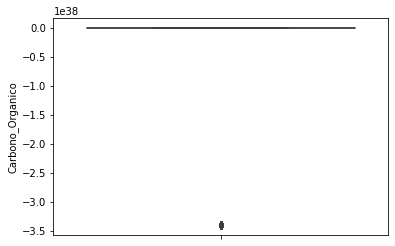

In [24]:
sns.boxplot( y=datos["Carbono_Organico"] );
plt.show()

<hr>
<h4>5. CÁRCAVAS (Categórica)</h4>
<p>Datos únicos: </p>

In [25]:
print(datos.Carcavas.unique())

[-9.999e+03  0.000e+00  1.000e+00]


In [26]:
print("Máximo: ", max(datos.Carcavas))
print("Mínimo: ", min(datos.Carcavas))
print("Media: ", datos["Carcavas"].mean())
print("STD: ", datos["Carcavas"].std())

Máximo:  1.0
Mínimo:  -9999.0
Media:  -84.19960827806284
STD:  913.8874513004766


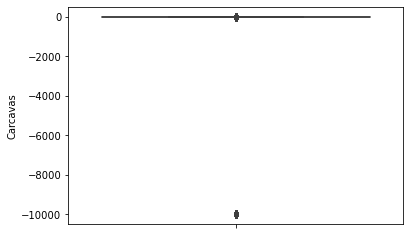

In [27]:
sns.boxplot( y=datos["Carcavas"] );
plt.show()

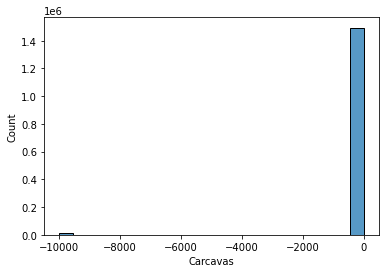

In [28]:
sns.histplot(data=datos, x="Carcavas")
plt.show()

<hr>
<h4>6. CURVATURA PERFIL (Continua)</h4>
<p>Datos únicos: </p>

In [29]:
print(datos.Curvatura_Perfil.unique())

[-0.18407732  0.13470331  0.04547764 ...  0.18324906  1.41650164
 -0.42282689]


In [30]:
print("Máximo: ", max(datos.Curvatura_Perfil))
print("Mínimo: ", min(datos.Curvatura_Perfil))
print("Media: ", datos["Curvatura_Perfil"].mean())
print("STD: ", datos["Curvatura_Perfil"].std())

Máximo:  41.293548583984375
Mínimo:  -34.95369338989258
Media:  0.01815298355598211
STD:  1.5891267120317334


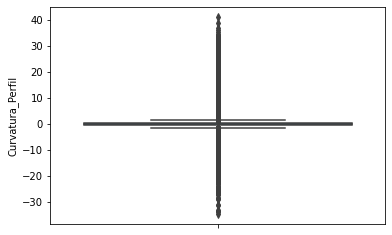

In [31]:
sns.boxplot( y=datos["Curvatura_Perfil"] );
plt.show()

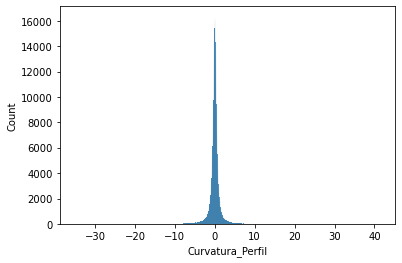

In [32]:
sns.histplot(data=datos, x="Curvatura_Perfil")
plt.show()

<hr>
<h4>7. CURVATURA PLANA (Continua)</h4>
<p>Datos únicos: </p>

In [33]:
print(datos.Curvatura_Plana.unique())

[ 0.36401838 -0.30938849  0.31732821 ...  2.26826644 -0.08054489
 -1.61874974]


In [34]:
print("Máximo: ", max(datos.Curvatura_Plana))
print("Mínimo: ", min(datos.Curvatura_Plana))
print("Media: ", datos["Curvatura_Plana"].mean())
print("STD: ", datos["Curvatura_Plana"].std())

Máximo:  50.11104965209961
Mínimo:  -38.32905197143555
Media:  0.018979349645439243
STD:  1.3114355366576713


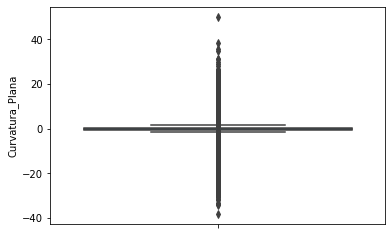

In [35]:
sns.boxplot( y=datos["Curvatura_Plana"] );
plt.show()

<hr>
<h4>8. DISTANCIA CARRETERAS (Continua)</h4>
<p>Datos únicos: </p>

In [36]:
print(datos.Distancia_Carreteras.unique())

[1065.95031738 1065.75085449 1065.57495117 ... 2091.46484375 2078.56933594
 2069.98803711]


In [37]:
print("Máximo: ", max(datos.Distancia_Carreteras))
print("Mínimo: ", min(datos.Distancia_Carreteras))
print("Media: ", datos["Distancia_Carreteras"].mean())
print("STD: ", datos["Distancia_Carreteras"].std())

Máximo:  3142.455322265625
Mínimo:  0.0
Media:  703.0370998257317
STD:  606.2593413773709


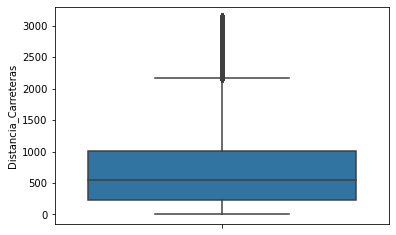

In [38]:
sns.boxplot( y=datos["Distancia_Carreteras"] );
plt.show()

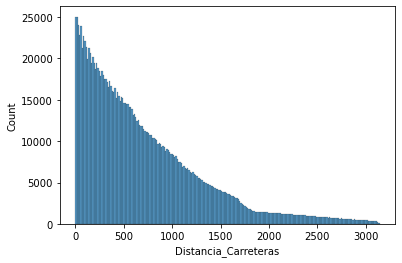

In [39]:
sns.histplot(data=datos, x="Distancia_Carreteras")
plt.show()

<hr>
<h4>9. FACTOR LS (Continua)</h4>
<p>Datos únicos: </p>

In [40]:
print(datos.Factor_LS.unique())

[-3.40282306e+38  7.09295154e-01  7.23207414e-01 ...  3.73179269e+00
  3.69373393e+00  4.38232470e+00]


In [41]:
print("Máximo: ", max(datos.Factor_LS))
print("Mínimo: ", min(datos.Factor_LS))
print("Media: ", datos["Factor_LS"].mean())
print("STD: ", datos["Factor_LS"].std())

Máximo:  17.909786224365234
Mínimo:  -3.4028230607370965e+38
Media:  -3.978554918920773e+36
STD:  3.657873468992057e+37


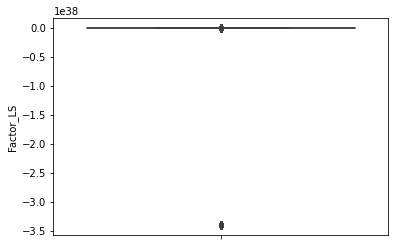

In [42]:
sns.boxplot( y=datos["Factor_LS"] );
plt.show()

<hr>
<h4>10. GEOLOGIA (Categórica)</h4>
<p>Datos únicos: </p>

In [43]:
print(datos.Geologia.unique())

[65535.  9001.  9201.  9103.  9202.  9133.  9004.  9134.  9132.]


In [44]:
print("Máximo: ", max(datos.Geologia))
print("Mínimo: ", min(datos.Geologia))
print("Media: ", datos["Geologia"].mean())
print("STD: ", datos["Geologia"].std())

Máximo:  65535.0
Mínimo:  9001.0
Media:  9638.837915258771
STD:  5129.849158765444


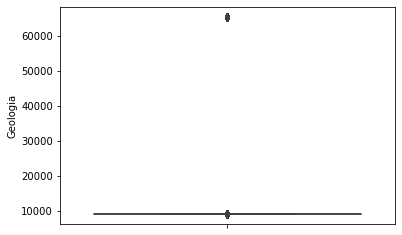

In [45]:
sns.boxplot( y=datos["Geologia"] );
plt.show()

<hr>
<h4>11. LIMOS (Continua)</h4>
<p>Datos únicos: </p>

In [46]:
print(datos.Limos.unique())

[-3.40282347e+38  4.09542809e+01  4.87741165e+01  4.87978630e+01
  4.85280418e+01  4.09860115e+01  3.77931633e+01  4.96565437e+01
  4.94437866e+01  4.76752968e+01  4.24410172e+01  3.98871231e+01
  3.75639572e+01  4.87278557e+01  3.79433517e+01  3.85810623e+01
  4.41491661e+01  4.08750038e+01  3.71906624e+01  3.84958191e+01
  4.55065765e+01  4.65406990e+01  4.45117722e+01  4.83284988e+01
  4.26984253e+01  4.90506744e+01  4.90596390e+01  5.09732857e+01
  4.37467232e+01  4.60391731e+01  4.72142029e+01  4.79927254e+01
  5.10639458e+01  5.36892395e+01  4.54811821e+01  4.20795631e+01
  3.86105652e+01  3.78179321e+01  4.36386528e+01  4.29099731e+01
  4.77266769e+01  4.68669357e+01  4.83764229e+01  4.05232124e+01
  4.43602028e+01  4.37741165e+01  4.52884789e+01  4.21281242e+01
  4.51180954e+01  4.69687424e+01  5.19620514e+01  5.15916595e+01
  4.00136032e+01  4.10978317e+01  4.10496445e+01  4.10199966e+01
  4.59481926e+01  5.00625725e+01  4.78316956e+01  4.92636337e+01
  4.52435036e+01  4.66160

In [47]:
print("Máximo: ", max(datos.Limos))
print("Mínimo: ", min(datos.Limos))
print("Media: ", datos["Limos"].mean())
print("STD: ", datos["Limos"].std())

Máximo:  53.689239501953125
Mínimo:  -3.4028234663852886e+38
Media:  -2.99407974839198e+36
STD:  3.1778430413690185e+37


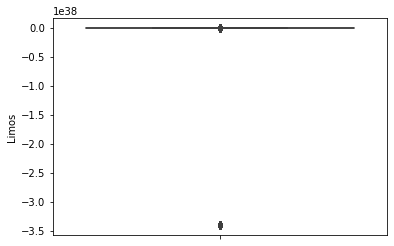

In [48]:
sns.boxplot( y=datos["Limos"] );
plt.show()

<hr>
<h4>12. ORIENTACIONES (Categórica)</h4>
<p>Datos únicos: </p>

In [49]:
print(datos.Orientaciones.unique())

[1. 2. 8. 7. 6. 3. 4. 5. 0.]


In [50]:
print("Máximo: ", max(datos.Orientaciones))
print("Mínimo: ", min(datos.Orientaciones))
print("Media: ", datos["Orientaciones"].mean())
print("STD: ", datos["Orientaciones"].std())

Máximo:  8.0
Mínimo:  0.0
Media:  4.3183978559496
STD:  2.3576736122622592


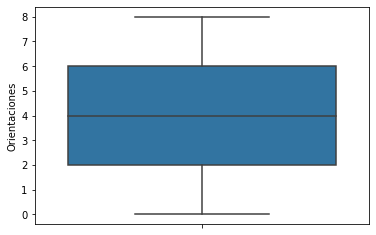

In [51]:
sns.boxplot( y=datos["Orientaciones"] );
plt.show()

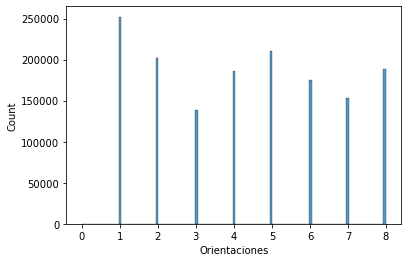

In [52]:
sns.histplot(data=datos, x="Orientaciones")
plt.show()

<hr>
<h4>13. OVERLAND FLOW DISTANCE (Continua)</h4>
<p>Datos únicos: </p>

In [53]:
print(datos.Overland_Flow_Distance.unique())

[  6.47895861   6.23379517   6.57220888 ... 123.60730743 120.29060364
 118.80422211]


In [54]:
print("Máximo: ", max(datos.Overland_Flow_Distance))
print("Mínimo: ", min(datos.Overland_Flow_Distance))
print("Media: ", datos["Overland_Flow_Distance"].mean())
print("STD: ", datos["Overland_Flow_Distance"].std())

Máximo:  5951.634765625
Mínimo:  0.0
Media:  1861.3908168794917
STD:  1299.3487632643848


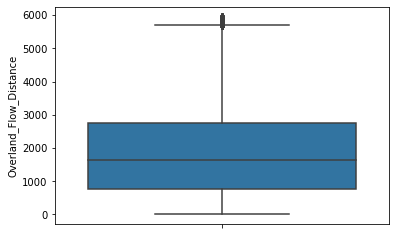

In [55]:
sns.boxplot( y=datos["Overland_Flow_Distance"] );
plt.show()

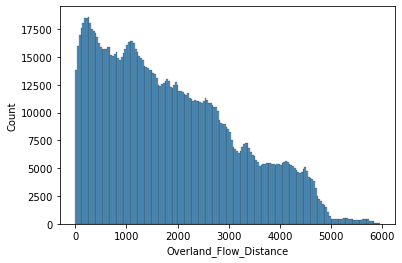

In [56]:
sns.histplot(data=datos, x="Overland_Flow_Distance")
plt.show()

<hr>
<h4>14. PENDIENTE (Continua)</h4>
<p>Datos únicos: </p>

In [57]:
print(datos.Pendiente.unique())

[6.19681358 5.45757771 5.43176985 ... 8.62158108 7.12483788 4.15854502]


In [58]:
print("Máximo: ", max(datos.Pendiente))
print("Mínimo: ", min(datos.Pendiente))
print("Media: ", datos["Pendiente"].mean())
print("STD: ", datos["Pendiente"].std())

Máximo:  55.544185638427734
Mínimo:  0.0
Media:  9.194766461059029
STD:  5.710998475716193


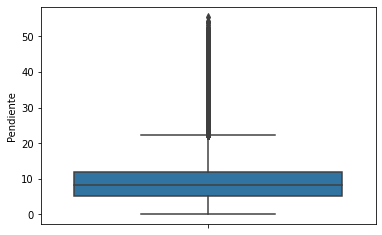

In [59]:
sns.boxplot( y=datos["Pendiente"] );
plt.show()

<hr>
<h4>15. STREAM POWER INDEX (Continua)</h4>
<p>Datos únicos: </p>

In [60]:
print(datos.Stream_Power_Index.unique())

[ -124.389328   -2127.203125   -1611.11730957 ...   -56.00585556
    79.26747894   144.37068176]


In [61]:
print("Máximo: ", max(datos.Stream_Power_Index))
print("Mínimo: ", min(datos.Stream_Power_Index))
print("Media: ", datos["Stream_Power_Index"].mean())
print("STD: ", datos["Stream_Power_Index"].std())

Máximo:  5080776704.0
Mínimo:  -5917084672.0
Media:  11278.499719547011
STD:  8658120.970200008


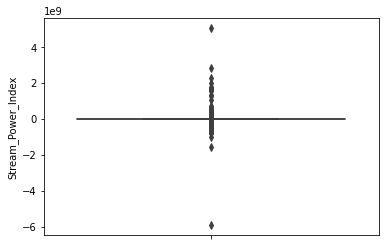

In [62]:
sns.boxplot( y=datos["Stream_Power_Index"] );
plt.show()

<hr>
<h4>16. TOPOGRAPHIC POSITION INDEX (Continua)</h4>
<p>Datos únicos: </p>

In [63]:
print(datos.Topographic_Position_Index.unique())

[-3.33549547 -3.36279917 -3.29873371 ...  4.97965527  4.5414052
  4.50697708]


In [64]:
print("Máximo: ", max(datos.Topographic_Position_Index))
print("Mínimo: ", min(datos.Topographic_Position_Index))
print("Media: ", datos["Topographic_Position_Index"].mean())
print("STD: ", datos["Topographic_Position_Index"].std())

Máximo:  22.681211471557617
Mínimo:  -22.029876708984375
Media:  -0.006762486502741315
STD:  3.3274743862691007


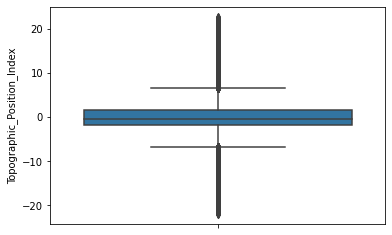

In [65]:
sns.boxplot( y=datos["Topographic_Position_Index"] );
plt.show()

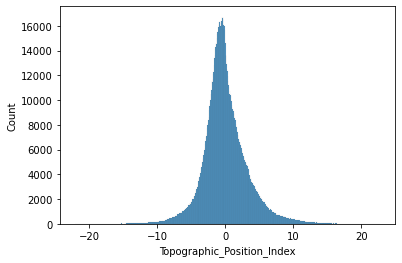

In [66]:
sns.histplot(data=datos, x="Topographic_Position_Index")
plt.show()

<hr>
<h4>17. TOPOGRAPHIC WETNESS INDEX (Continua)</h4>
<p>Datos únicos: </p>

In [67]:
print(datos.Topographic_Wetness_Index.unique())

[14.17777538 14.48981285 14.16001892 ... 10.89760685  4.1473341
  4.0111661 ]


In [68]:
print("Máximo: ", max(datos.Topographic_Wetness_Index))
print("Mínimo: ", min(datos.Topographic_Wetness_Index))
print("Media: ", datos["Topographic_Wetness_Index"].mean())
print("STD: ", datos["Topographic_Wetness_Index"].std())

Máximo:  23.72909927368164
Mínimo:  -9.109371185302734
Media:  9.538391994479372
STD:  3.878908998685805


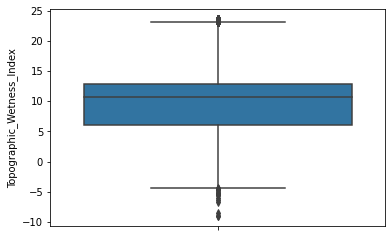

In [69]:
sns.boxplot( y=datos["Topographic_Wetness_Index"] );
plt.show()

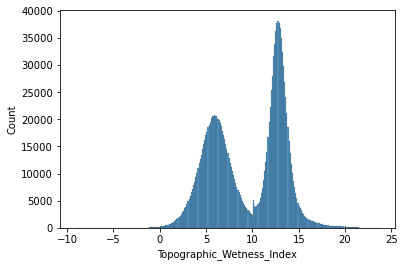

In [70]:
sns.histplot(data=datos, x="Topographic_Wetness_Index")
plt.show()

<hr>
<h4>18. UNIDADES EDÁFICAS (Categórica)</h4>
<p>Datos únicos: </p>

In [71]:
print(datos.Unidades_Edaficas.unique())

[0. 6. 5. 1. 4. 3. 2.]


In [72]:
print("Máximo: ", max(datos.Unidades_Edaficas))
print("Mínimo: ", min(datos.Unidades_Edaficas))
print("Media: ", datos["Unidades_Edaficas"].mean())
print("STD: ", datos["Unidades_Edaficas"].std())

Máximo:  6.0
Mínimo:  0.0
Media:  4.803272225507589
STD:  1.760296144612931


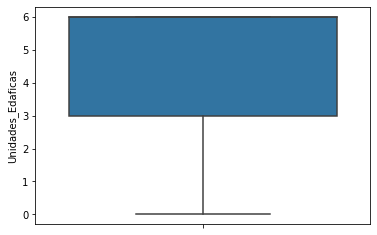

In [73]:
sns.boxplot( y=datos["Unidades_Edaficas"] );
plt.show()

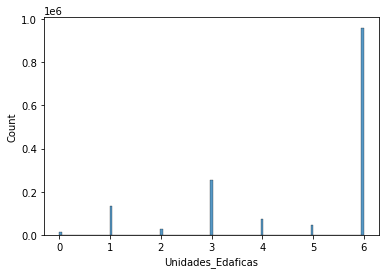

In [74]:
sns.histplot(data=datos, x="Unidades_Edaficas")
plt.show()

<hr>
<h4>19. USOS DEL SUELO (Categórica)</h4>
<p>Datos únicos: </p>

In [75]:
print(datos.Usos_Del_Suelo.unique())

[15.  3.  1.  2.  4.]


In [76]:
print("Máximo: ", max(datos.Usos_Del_Suelo))
print("Mínimo: ", min(datos.Usos_Del_Suelo))
print("Media: ", datos["Usos_Del_Suelo"].mean())
print("STD: ", datos["Usos_Del_Suelo"].std())

Máximo:  15.0
Mínimo:  1.0
Media:  2.137699353745086
STD:  1.202274222155473


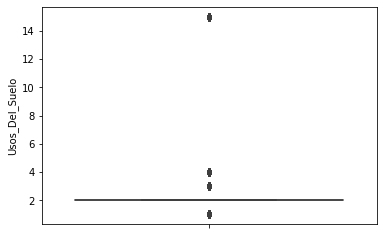

In [77]:
sns.boxplot( y=datos["Usos_Del_Suelo"] );
plt.show()

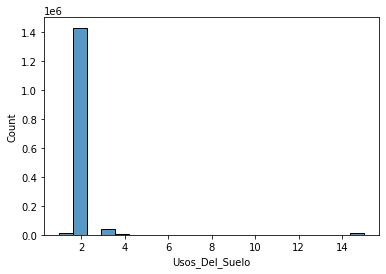

In [78]:
sns.histplot(data=datos, x="Usos_Del_Suelo")
plt.show()